# WeatherPy

In [106]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress
import pandas as pd
import numpy as np
import json
import requests
from config import weather_api_key
from config import g_key
from citipy import citipy

In [79]:
# Indicate the Output File (CSV) path
output_data_file = "Output_file/cities.csv"

# Choose a range of latitudes and longitudes to pick cities from
lat_range = (30, -30)
lon_range = (-90, -50)

In [80]:
# Create empty lists for coordinates and city names
lat_lon = []
cities = []

# Create a set of random latitudes and longitudes
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lon = zip(lat, lon)

# Identify nearest city for each lat, lng 
for lat_lon in lat_lon:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to the list of cities
    if city not in cities:
        cities.append(city)
# Print the cities
cities

['la rioja',
 'codrington',
 'mayor pablo lagerenza',
 'bathsheba',
 'saint-francois',
 'mana',
 'savannah bight',
 'sao paulo de olivenca',
 'saint george',
 'salta',
 'barranca',
 'le lorrain',
 'burica',
 'hamilton',
 'the valley',
 'huarmey',
 'talara',
 'tucuma',
 'mosquera',
 'carora',
 'tulum',
 'barcelos',
 'grand-santi',
 'tarauaca',
 'porto de moz',
 'iracoubo',
 'pedernales',
 'aripuana',
 'boa vista',
 'san cristobal',
 'reconquista',
 'palmital',
 'bull savanna',
 'san ignacio',
 'ivaipora',
 'alta floresta',
 'riberalta',
 'cockburn town',
 'barra do garcas',
 'bajo baudo',
 'itaituba',
 'falmouth',
 'porto walter',
 'cartagena',
 'guajara-mirim',
 'la paz',
 'sinnamary',
 'firminopolis',
 'copiapo',
 'iquique',
 'parintins',
 'uyuni',
 'calama',
 'diego de almagro',
 'san felipe',
 'pozo colorado',
 'coquimbo',
 'road town',
 'manaus',
 'carauari',
 'antofagasta',
 'marcona',
 'san ramon',
 'mozarlandia',
 'eirunepe',
 'chunhuhub',
 'lebu',
 'cachoeira do sul',
 'jujuy',

In [81]:
len (cities)

546

In [82]:
# Perform API Calls

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={g_key}&units={units}&q="

query_url + city
response = requests.get(query_url + city).json()
response

{'coord': {'lon': -56.0861, 'lat': -9.8756},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 21.66,
  'feels_like': 22.47,
  'temp_min': 21.66,
  'temp_max': 21.66,
  'pressure': 1013,
  'humidity': 99,
  'sea_level': 1013,
  'grnd_level': 979},
 'visibility': 10000,
 'wind': {'speed': 2.22, 'deg': 165, 'gust': 8.23},
 'rain': {'1h': 0.38},
 'clouds': {'all': 86},
 'dt': 1635142777,
 'sys': {'country': 'BR', 'sunrise': 1635153370, 'sunset': 1635198021},
 'timezone': -14400,
 'id': 6316343,
 'name': 'Alta Floresta',
 'cod': 200}

In [167]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).

# set up empty lists to store reponse 
lat = []
lon = []
temp = []
humidity = []
clouds = []
windspeed = []
count=0
cityname=[]
city_country = []
dt=[]


# Loop through the list of cities and perform a request for each dataset
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        print(f"{response}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        cityname.append(response['name'])
        city_country.append(response["sys"]["country"])
        date.append(response['dt'])
        count=count+1
        #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        
#print data
print(f"lat: {lat} {len(lat)}")
print(f"lon: {lon} {len(lon)}")
print(f"temp: {temp} {len(temp)}")
print(f"humidity: {humidity} {len(humidity)}")
print(f"clouds: {clouds} {len(clouds)}")
print(f"windspeed: {wind_speed} {len(windspeed)}")
print(f"date: {date} {len(date)}")
print(f"country: {city_country} {len(city_country)}")
print(f"cityname: {cityname} {len(cityname)}")

{'coord': {'lon': -2.5, 'lat': 42.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.16, 'feels_like': 8.38, 'temp_min': 7.88, 'temp_max': 9.16, 'pressure': 1022, 'humidity': 29, 'sea_level': 1022, 'grnd_level': 910}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 28, 'gust': 0.81}, 'clouds': {'all': 5}, 'dt': 1635155325, 'sys': {'type': 2, 'id': 2035538, 'country': 'ES', 'sunrise': 1635143666, 'sunset': 1635182005}, 'timezone': 7200, 'id': 3336897, 'name': 'La Rioja', 'cod': 200}
{'coord': {'lon': 141.9667, 'lat': -38.2667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 8.12, 'feels_like': 6, 'temp_min': 8.12, 'temp_max': 8.12, 'pressure': 1022, 'humidity': 78, 'sea_level': 1022, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 3.43, 'deg': 128, 'gust': 4.68}, 'clouds': {'all': 3}, 'dt': 1635155327, 'sys': {'country

{'coord': {'lon': -81.2719, 'lat': -4.5772}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 18.07, 'feels_like': 18.15, 'temp_min': 18.07, 'temp_max': 18.07, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.24, 'deg': 172, 'gust': 8.49}, 'clouds': {'all': 29}, 'dt': 1635155347, 'sys': {'country': 'PE', 'sunrise': 1635159696, 'sunset': 1635203783}, 'timezone': -18000, 'id': 3691582, 'name': 'Talara', 'cod': 200}
{'coord': {'lon': -50.05, 'lat': -0.1833}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 25.64, 'feels_like': 26.61, 'temp_min': 25.64, 'temp_max': 25.64, 'pressure': 1013, 'humidity': 90, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.18, 'deg': 109, 'gust': 6.22}, 'clouds': {'all': 23}, 'dt': 1635155349, 'sys': {'count

{'coord': {'lon': -50.2175, 'lat': -22.7889}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.09, 'feels_like': 17.1, 'temp_min': 17.09, 'temp_max': 17.09, 'pressure': 1019, 'humidity': 86, 'sea_level': 1019, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 5.25, 'deg': 116, 'gust': 10.86}, 'clouds': {'all': 100}, 'dt': 1635155160, 'sys': {'country': 'BR', 'sunrise': 1635151213, 'sunset': 1635197361}, 'timezone': -10800, 'id': 3455342, 'name': 'Palmital', 'cod': 200}
{'coord': {'lon': -77.5902, 'lat': 17.8868}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.26, 'feels_like': 25.01, 'temp_min': 24.26, 'temp_max': 24.26, 'pressure': 1015, 'humidity': 87, 'sea_level': 1015, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 80, 'gust': 4.27}, 'clouds': {'all': 93}, 'dt': 1635155370, 'sys': {

{'coord': {'lon': -70.3333, 'lat': -27.3667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.83, 'feels_like': 10.08, 'temp_min': 10.83, 'temp_max': 10.83, 'pressure': 1016, 'humidity': 81, 'sea_level': 1016, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 1.18, 'deg': 279, 'gust': 1.29}, 'clouds': {'all': 3}, 'dt': 1635155394, 'sys': {'type': 1, 'id': 8481, 'country': 'CL', 'sunrise': 1635155737, 'sunset': 1635202492}, 'timezone': -10800, 'id': 3893656, 'name': 'Copiapó', 'cod': 200}
{'coord': {'lon': -70.1431, 'lat': -20.2208}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.02, 'feels_like': 13.44, 'temp_min': 14.02, 'temp_max': 14.02, 'pressure': 1017, 'humidity': 75, 'sea_level': 1017, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.84, 'deg': 57, 'gust': 0.9}, 'clouds': {'all': 2}, 'dt': 1635155395, '

{'coord': {'lon': -69.8736, 'lat': -6.6603}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.91, 'feels_like': 23.66, 'temp_min': 22.91, 'temp_max': 22.91, 'pressure': 1011, 'humidity': 92, 'sea_level': 1011, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 0.26, 'deg': 122, 'gust': 1.35}, 'rain': {'1h': 0.61}, 'clouds': {'all': 78}, 'dt': 1635155415, 'sys': {'country': 'BR', 'sunrise': 1635156851, 'sunset': 1635201158}, 'timezone': -18000, 'id': 3664321, 'name': 'Eirunepé', 'cod': 200}
{'coord': {'lon': -88.6833, 'lat': 19.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.91, 'feels_like': 24.97, 'temp_min': 23.91, 'temp_max': 23.91, 'pressure': 1012, 'humidity': 100, 'sea_level': 1012, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 127, 'gust': 7.97}, 'clouds': {'all': 70}, 'dt': 1635155

{'coord': {'lon': -71.2261, 'lat': -14.2694}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 9.17, 'feels_like': 9.17, 'temp_min': 9.17, 'temp_max': 9.17, 'pressure': 1017, 'humidity': 70, 'sea_level': 1017, 'grnd_level': 663}, 'visibility': 10000, 'wind': {'speed': 0.53, 'deg': 342, 'gust': 0.74}, 'rain': {'1h': 0.5}, 'clouds': {'all': 93}, 'dt': 1635155436, 'sys': {'country': 'PE', 'sunrise': 1635156759, 'sunset': 1635201898}, 'timezone': -18000, 'id': 3928679, 'name': 'Sicuani', 'cod': 200}
{'coord': {'lon': -55.8661, 'lat': -1.7656}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.22, 'feels_like': 24.92, 'temp_min': 24.22, 'temp_max': 24.22, 'pressure': 1012, 'humidity': 85, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.26, 'deg': 51, 'gust': 4.92}, 'clouds': {'all': 87}, 'dt': 1635155438

{'coord': {'lon': -68.2667, 'lat': 12.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.99, 'feels_like': 29.53, 'temp_min': 26.99, 'temp_max': 26.99, 'pressure': 1013, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1635155460, 'sys': {'type': 1, 'id': 8794, 'country': 'BQ', 'sunrise': 1635157452, 'sunset': 1635199785}, 'timezone': -14400, 'id': 3513563, 'name': 'Kralendijk', 'cod': 200}
{'coord': {'lon': -70.4833, 'lat': -25.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.4, 'feels_like': 13.09, 'temp_min': 13.4, 'temp_max': 13.4, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 1.42, 'deg': 45, 'gust': 1.79}, 'clouds': {'all': 60}, 'dt': 1635155461, 'sys': {'country': 'CL', 'sunrise': 1635155905,

{'coord': {'lon': -77.0636, 'lat': 26.5412}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.67, 'feels_like': 29.18, 'temp_min': 26.67, 'temp_max': 26.67, 'pressure': 1016, 'humidity': 82, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 6.31, 'deg': 174, 'gust': 8.02}, 'clouds': {'all': 100}, 'dt': 1635155482, 'sys': {'country': 'BS', 'sunrise': 1635160393, 'sunset': 1635201066}, 'timezone': -14400, 'id': 3571913, 'name': 'Marsh Harbour', 'cod': 200}
{'coord': {'lon': -72.9072, 'lat': 11.5444}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.72, 'feels_like': 26.38, 'temp_min': 25.72, 'temp_max': 25.72, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.54, 'deg': 83, 'gust': 9.98}, 'clouds': {'all': 49}, 'dt': 1635155258, 

{'coord': {'lon': -66.2662, 'lat': -2.4959}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.25, 'feels_like': 23.12, 'temp_min': 22.25, 'temp_max': 22.25, 'pressure': 1011, 'humidity': 99, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.1, 'deg': 65, 'gust': 7.09}, 'clouds': {'all': 100}, 'dt': 1635155500, 'sys': {'country': 'BR', 'sunrise': 1635156204, 'sunset': 1635200072}, 'timezone': -14400, 'id': 6319315, 'name': 'Fonte Boa', 'cod': 200}
{'coord': {'lon': -63.5, 'lat': -21.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.64, 'feels_like': 14.54, 'temp_min': 15.64, 'temp_max': 15.64, 'pressure': 1017, 'humidity': 49, 'sea_level': 1017, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 2.11, 'deg': 284, 'gust': 1.61}, 'clouds': {'all': 0}, 'dt': 1635155502, 'sys': {'country': 

{'coord': {'lon': -81.2081, 'lat': 28.7086}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.32, 'feels_like': 24.16, 'temp_min': 21.81, 'temp_max': 24.99, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 280}, 'clouds': {'all': 90}, 'dt': 1635155522, 'sys': {'type': 2, 'id': 2039589, 'country': 'US', 'sunrise': 1635161528, 'sunset': 1635201920}, 'timezone': -14400, 'id': 4172445, 'name': 'Seminole', 'cod': 200}
{'coord': {'lon': -76.5333, 'lat': -10.4333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.58, 'feels_like': 2.58, 'temp_min': 2.58, 'temp_max': 2.58, 'pressure': 1021, 'humidity': 89, 'sea_level': 1021, 'grnd_level': 615}, 'visibility': 10000, 'wind': {'speed': 0.6, 'deg': 48, 'gust': 0.6}, 'clouds': {'all': 73}, 'dt': 1635155523, 'sys': {'country': 'PE', 'sunrise': 163515

{'coord': {'lon': 19.0266, 'lat': 54.0359}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.36, 'feels_like': 6.32, 'temp_min': 7.15, 'temp_max': 10.03, 'pressure': 1023, 'humidity': 80, 'sea_level': 1023, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 6.34, 'deg': 190, 'gust': 9.62}, 'clouds': {'all': 83}, 'dt': 1635155544, 'sys': {'type': 2, 'id': 2030805, 'country': 'PL', 'sunrise': 1635139849, 'sunset': 1635175490}, 'timezone': 7200, 'id': 3092472, 'name': 'Malbork', 'cod': 200}
{'coord': {'lon': -122.4194, 'lat': 37.7749}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.27, 'feels_like': 13.08, 'temp_min': 12.18, 'temp_max': 14.63, 'pressure': 1003, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 153, 'gust': 1.34}, 'rain': {'1h': 0.97}, 'clouds': {'all': 90}, 'dt': 1635155443, 'sys': {'typ

{'coord': {'lon': -66.908, 'lat': 17.9716}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.09, 'feels_like': 24.75, 'temp_min': 22.34, 'temp_max': 26.21, 'pressure': 1015, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 360, 'gust': 1.79}, 'clouds': {'all': 5}, 'dt': 1635155564, 'sys': {'type': 2, 'id': 2040053, 'country': 'PR', 'sunrise': 1635157445, 'sunset': 1635199140}, 'timezone': -14400, 'id': 4565090, 'name': 'Guánica', 'cod': 200}
{'coord': {'lon': -76.1323, 'lat': -13.4099}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.33, 'feels_like': 11.89, 'temp_min': 12.09, 'temp_max': 12.33, 'pressure': 1015, 'humidity': 87, 'sea_level': 1015, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 334, 'gust': 1.87}, 'clouds': {'all': 8}, 'dt': 1635155565, 'sys': {'type': 1, 'id': 8691, 'count

{'coord': {'lon': -64.7981, 'lat': -7.2586}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.4, 'feels_like': 23.28, 'temp_min': 22.4, 'temp_max': 22.4, 'pressure': 1012, 'humidity': 99, 'sea_level': 1012, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 168, 'gust': 7.04}, 'rain': {'1h': 2.21}, 'clouds': {'all': 91}, 'dt': 1635155588, 'sys': {'country': 'BR', 'sunrise': 1635155601, 'sunset': 1635199971}, 'timezone': -14400, 'id': 3663684, 'name': 'Lábrea', 'cod': 200}
{'coord': {'lon': -72.6509, 'lat': -7.738}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.2, 'feels_like': 23.93, 'temp_min': 23.2, 'temp_max': 23.2, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 0.88, 'deg': 10, 'gust': 0.93}, 'clouds': {'all': 23}, 'dt': 1635155590, 'sys

{'coord': {'lon': -64.3831, 'lat': -6.5339}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 22.78, 'feels_like': 23.65, 'temp_min': 22.78, 'temp_max': 22.78, 'pressure': 1011, 'humidity': 97, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 139, 'gust': 2.79}, 'rain': {'1h': 0.15}, 'clouds': {'all': 92}, 'dt': 1635155609, 'sys': {'country': 'BR', 'sunrise': 1635155540, 'sunset': 1635199833}, 'timezone': -14400, 'id': 3664716, 'name': 'Canutama', 'cod': 200}
{'coord': {'lon': -78.4167, 'lat': -1.4}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.69, 'feels_like': 13.41, 'temp_min': 13.69, 'temp_max': 13.69, 'pressure': 1019, 'humidity': 88, 'sea_level': 1019, 'grnd_level': 800}, 'visibility': 10000, 'wind': {'speed': 0.88, 'deg': 262, 'gust': 1.28}, 'clouds': {'all': 90}, 'dt': 16351556

{'coord': {'lon': -49.2647, 'lat': -8.2578}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.07, 'feels_like': 25.7, 'temp_min': 25.07, 'temp_max': 25.07, 'pressure': 1013, 'humidity': 79, 'sea_level': 1013, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 0.75, 'deg': 353, 'gust': 1.12}, 'clouds': {'all': 77}, 'dt': 1635155632, 'sys': {'country': 'BR', 'sunrise': 1635151820, 'sunset': 1635196297}, 'timezone': -10800, 'id': 3401845, 'name': 'Conceição do Araguaia', 'cod': 200}
{'coord': {'lon': -77.8487, 'lat': 18.0264}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 26, 'temp_min': 26, 'temp_max': 26, 'pressure': 1015, 'humidity': 86, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.12, 'deg': 85, 'gust': 2.59}, 'clouds': {'all': 90}, 'dt': 1635155634, 'sys': {'t

{'coord': {'lon': 22.9573, 'lat': 37.9407}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 16.64, 'feels_like': 16.14, 'temp_min': 15.25, 'temp_max': 17.57, 'pressure': 1023, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 45, 'gust': 4.47}, 'rain': {'1h': 0.24}, 'clouds': {'all': 100}, 'dt': 1635155655, 'sys': {'type': 2, 'id': 2039794, 'country': 'GR', 'sunrise': 1635137182, 'sunset': 1635176270}, 'timezone': 10800, 'id': 259289, 'name': 'Corinth', 'cod': 200}
{'coord': {'lon': -6.3748, 'lat': 39.522}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.89, 'feels_like': 13.51, 'temp_min': 14.89, 'temp_max': 14.89, 'pressure': 1022, 'humidity': 41, 'sea_level': 1022, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 1.93, 'deg': 23, 'gust': 1.66}, 'clouds': {'all': 76}, 'dt': 1635155656, 'sys': {'type'

{'coord': {'lon': -73.5832, 'lat': 40.6576}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.38, 'feels_like': 17.31, 'temp_min': 12.64, 'temp_max': 19.45, 'pressure': 1016, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 199, 'gust': 7.15}, 'clouds': {'all': 100}, 'dt': 1635155678, 'sys': {'type': 2, 'id': 2020193, 'country': 'US', 'sunrise': 1635160597, 'sunset': 1635199191}, 'timezone': -14400, 'id': 5117949, 'name': 'Freeport', 'cod': 200}
{'coord': {'lon': -81.4173, 'lat': 26.4187}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 24.1, 'feels_like': 25.12, 'temp_min': 23.84, 'temp_max': 24.97, 'pressure': 1015, 'humidity': 98}, 'visibility': 8047, 'wind': {'speed': 2.57, 'deg': 200}, 'rain': {'1h': 2.05}, 'clouds': {'all': 90}, 'dt': 

{'coord': {'lon': -77.7667, 'lat': 24.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.98, 'feels_like': 25.98, 'temp_min': 25.98, 'temp_max': 25.98, 'pressure': 1016, 'humidity': 82, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 5.24, 'deg': 168, 'gust': 6.9}, 'clouds': {'all': 86}, 'dt': 1635155700, 'sys': {'type': 1, 'id': 7269, 'country': 'BS', 'sunrise': 1635160447, 'sunset': 1635201349}, 'timezone': -14400, 'id': 3572906, 'name': 'Andros Town', 'cod': 200}
{'coord': {'lon': -53.7772, 'lat': -27.8508}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10.7, 'feels_like': 9.86, 'temp_min': 10.7, 'temp_max': 10.7, 'pressure': 1020, 'humidity': 78, 'sea_level': 1020, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 2.05, 'deg': 79, 'gust': 3.67}, 'clouds': {'all': 0}, 'dt': 163515570

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'coord': {'lon': -67.3978, 'lat': -8.7522}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.84, 'feels_like': 22.59, 'temp_min': 21.84, 'temp_max': 21.84, 'pressure': 1013, 'humidity': 96, 'sea_level': 1013, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 2.36, 'deg': 165, 'gust': 8.48}, 'rain': {'1h': 0.22}, 'clouds': {'all': 100}, 'dt': 1635155721, 'sys': {'country': 'BR', 'sunrise': 1635156145, 'sunset': 1635200675}, 'timezone': -14400, 'id': 3664956, 'name': 'Boca do Acre', 'cod': 200}
{'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.97, 'feels_like': 35.96, 'temp_min': 29.94, 'temp_max': 29.99, 'pressure': 1007, 'humidity': 74}, 'visibility': 9000, 'wind': {'speed': 0.45, 'deg': 113, 'gust': 0.45}, '

{'coord': {'lon': -79.9342, 'lat': -6.8367}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 16.69, 'feels_like': 16.74, 'temp_min': 16.69, 'temp_max': 16.69, 'pressure': 1015, 'humidity': 89, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.93, 'deg': 165, 'gust': 6.37}, 'clouds': {'all': 27}, 'dt': 1635155744, 'sys': {'country': 'PE', 'sunrise': 1635159255, 'sunset': 1635203582}, 'timezone': -18000, 'id': 3693584, 'name': 'Pimentel', 'cod': 200}
{'coord': {'lon': -88.05, 'lat': 19.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.4, 'feels_like': 25.48, 'temp_min': 24.4, 'temp_max': 24.4, 'pressure': 1012, 'humidity': 99, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.25, 'deg': 125, 'gust': 7.53}, 'clouds': {'all': 62}, 'dt': 1635155746, 'sys': {'cou

{'coord': {'lon': -58.4, 'lat': -16.3667}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 20.31, 'feels_like': 20.56, 'temp_min': 20.31, 'temp_max': 20.31, 'pressure': 1015, 'humidity': 83, 'sea_level': 1015, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 2.11, 'deg': 171, 'gust': 6.1}, 'rain': {'1h': 0.2}, 'clouds': {'all': 100}, 'dt': 1635155768, 'sys': {'country': 'BO', 'sunrise': 1635153562, 'sunset': 1635198939}, 'timezone': -14400, 'id': 3444105, 'name': 'San Matías', 'cod': 200}
{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 12.19, 'feels_like': 11.19, 'temp_min': 12.19, 'temp_max': 12.19, 'pressure': 1017, 'humidity': 66, 'sea_level': 1017, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 5.38, 'deg': 328, 'gust': 11.11}, 'clouds': {'all': 0}, 'dt': 1635155770,

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'coord': {'lon': -63.2585, 'lat': 10.6678}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.81, 'feels_like': 25.67, 'temp_min': 24.81, 'temp_max': 24.81, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.41, 'deg': 100, 'gust': 4.98}, 'clouds': {'all': 92}, 'dt': 1635155791, 'sys': {'country': 'VE', 'sunrise': 1635156170, 'sunset': 1635198663}, 'timezone': -14400, 'id': 3646382, 'name': 'Carupano', 'cod': 200}
{'coord': {'lon': -58.6167, 'lat': 6.4}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 24.18, 'feels_like': 25.26, 'temp_min': 24.18, 'temp_max': 24.18, 'pressure': 1013, 'humidity': 100, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 0.54, 'deg': 15

{'coord': {'lon': -59.8119, 'lat': -3.2003}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.34, 'feels_like': 26.34, 'temp_min': 24.35, 'temp_max': 26.34, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.16, 'deg': 92, 'gust': 1.82}, 'clouds': {'all': 99}, 'dt': 1635155812, 'sys': {'type': 1, 'id': 8412, 'country': 'BR', 'sunrise': 1635154619, 'sunset': 1635198560}, 'timezone': -14400, 'id': 3402920, 'name': 'Careiro da Várzea', 'cod': 200}
{'coord': {'lon': -83.0418, 'lat': 12.1694}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 28.06, 'feels_like': 31.94, 'temp_min': 28.06, 'temp_max': 28.06, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.15, 'deg': 58, 'gust': 3.21}, 'clouds': {'all': 13},

{'coord': {'lon': -70.2167, 'lat': -7.3}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.02, 'feels_like': 22.86, 'temp_min': 22.02, 'temp_max': 22.02, 'pressure': 1012, 'humidity': 99, 'sea_level': 1012, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 2.35, 'deg': 147, 'gust': 8.52}, 'rain': {'1h': 1.89}, 'clouds': {'all': 97}, 'dt': 1635155833, 'sys': {'country': 'BR', 'sunrise': 1635156899, 'sunset': 1635201274}, 'timezone': -18000, 'id': 3664301, 'name': 'Envira', 'cod': 200}
{'coord': {'lon': -75.8814, 'lat': 8.748}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.5, 'feels_like': 24.33, 'temp_min': 23.5, 'temp_max': 23.5, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.46, 'deg': 232, 'gust': 1.47}, 'clouds': {'all': 72}, 'dt': 1635155835, '

{'coord': {'lon': -74.8086, 'lat': 7.5927}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.61, 'feels_like': 23.54, 'temp_min': 22.61, 'temp_max': 22.61, 'pressure': 1012, 'humidity': 100, 'sea_level': 1012, 'grnd_level': 1005}, 'visibility': 5285, 'wind': {'speed': 0.08, 'deg': 203, 'gust': 0.25}, 'clouds': {'all': 97}, 'dt': 1635155855, 'sys': {'country': 'CO', 'sunrise': 1635158780, 'sunset': 1635201597}, 'timezone': -18000, 'id': 3684945, 'name': 'El Bagre', 'cod': 200}
{'coord': {'lon': -68.5827, 'lat': 9.6612}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.73, 'feels_like': 22.41, 'temp_min': 21.73, 'temp_max': 21.73, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 1.43, 'deg': 5, 'gust': 1.43}, 'clouds': {'all': 86}, 'dt': 1635155856, 'sys': {'co

{'coord': {'lon': -91.5667, 'lat': 14.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.29, 'feels_like': 10.64, 'temp_min': 9.7, 'temp_max': 13.12, 'pressure': 1018, 'humidity': 83, 'sea_level': 1018, 'grnd_level': 762}, 'visibility': 10000, 'wind': {'speed': 1.74, 'deg': 21, 'gust': 1.7}, 'clouds': {'all': 86}, 'dt': 1635155875, 'sys': {'type': 2, 'id': 2007800, 'country': 'GT', 'sunrise': 1635163192, 'sunset': 1635205228}, 'timezone': -21600, 'id': 3594703, 'name': 'La Esperanza', 'cod': 200}
{'coord': {'lon': -54.0667, 'lat': -20.4167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 16.56, 'feels_like': 16.52, 'temp_min': 16.56, 'temp_max': 16.56, 'pressure': 1017, 'humidity': 86, 'sea_level': 1017, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 2.32, 'deg': 142, 'gust': 5.42}, 'clouds': {'all': 28}

{'coord': {'lon': -69.1833, 'lat': -12.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.38, 'feels_like': 20.17, 'temp_min': 20.38, 'temp_max': 20.38, 'pressure': 1016, 'humidity': 65, 'sea_level': 1016, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 3.52, 'deg': 121, 'gust': 12.85}, 'clouds': {'all': 100}, 'dt': 1635155897, 'sys': {'country': 'PE', 'sunrise': 1635156363, 'sunset': 1635201314}, 'timezone': -18000, 'id': 3931470, 'name': 'Puerto Maldonado', 'cod': 200}
{'coord': {'lon': -51.9542, 'lat': -2.5908}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.02, 'feels_like': 24.75, 'temp_min': 24.02, 'temp_max': 24.02, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.15, 'deg': 93, 'gust': 2.54}, 'clouds': {'all': 88}, 'dt': 1635155899, 

{'coord': {'lon': -89.6667, 'lat': 21.2833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.62, 'feels_like': 26.69, 'temp_min': 25.62, 'temp_max': 25.62, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.68, 'deg': 163, 'gust': 5.2}, 'clouds': {'all': 87}, 'dt': 1635155920, 'sys': {'type': 2, 'id': 2007869, 'country': 'MX', 'sunrise': 1635163099, 'sunset': 1635204409}, 'timezone': -18000, 'id': 3521108, 'name': 'Progreso', 'cod': 200}
{'coord': {'lon': -51.9853, 'lat': -29.5128}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 11.77, 'feels_like': 11.48, 'temp_min': 9.86, 'temp_max': 13.62, 'pressure': 1020, 'humidity': 95, 'sea_level': 1020, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 358, 'gust': 4.59}, 'clouds': {'all': 0}, 'dt': 16

{'coord': {'lon': -75.24, 'lat': 4.2392}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.26, 'feels_like': 19.54, 'temp_min': 19.26, 'temp_max': 19.26, 'pressure': 1015, 'humidity': 88, 'sea_level': 1015, 'grnd_level': 918}, 'visibility': 10000, 'wind': {'speed': 1.63, 'deg': 295, 'gust': 1.27}, 'rain': {'1h': 0.48}, 'clouds': {'all': 69}, 'dt': 1635155942, 'sys': {'country': 'CO', 'sunrise': 1635158709, 'sunset': 1635201875}, 'timezone': -18000, 'id': 3670587, 'name': 'Rovira', 'cod': 200}
{'coord': {'lon': -59.4307, 'lat': -34.6515}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 16.61, 'feels_like': 15.29, 'temp_min': 15.57, 'temp_max': 17.69, 'pressure': 1011, 'humidity': 37, 'sea_level': 1011, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 5.91, 'deg': 292, 'gust': 18.03}, 'clouds': {'all': 0}, 'dt': 1635155944, 'sy

{'coord': {'lon': -72.8814, 'lat': -13.6339}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 13.86, 'feels_like': 13.57, 'temp_min': 13.86, 'temp_max': 13.86, 'pressure': 1018, 'humidity': 87, 'sea_level': 1018, 'grnd_level': 769}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 310, 'gust': 1.19}, 'clouds': {'all': 25}, 'dt': 1635155969, 'sys': {'country': 'PE', 'sunrise': 1635157192, 'sunset': 1635202260}, 'timezone': -18000, 'id': 3948642, 'name': 'Abancay', 'cod': 200}
{'coord': {'lon': -75.4007, 'lat': 7.5836}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.6, 'feels_like': 23.47, 'temp_min': 22.6, 'temp_max': 22.6, 'pressure': 1013, 'humidity': 98, 'sea_level': 1013, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 194, 'gust': 1.04}, 'clouds': {'all': 100}, 'dt': 1635155970, 'sys': {'

{'coord': {'lon': -58.4442, 'lat': -3.1431}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.31, 'feels_like': 25.17, 'temp_min': 24.31, 'temp_max': 24.31, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.12, 'deg': 71, 'gust': 2.01}, 'clouds': {'all': 98}, 'dt': 1635155987, 'sys': {'country': 'BR', 'sunrise': 1635154294, 'sunset': 1635198229}, 'timezone': -14400, 'id': 3397893, 'name': 'Itacoatiara', 'cod': 200}
{'coord': {'lon': -67.5167, 'lat': -17.5833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 3.85, 'feels_like': 3.85, 'temp_min': 3.85, 'temp_max': 3.85, 'pressure': 1020, 'humidity': 59, 'sea_level': 1020, 'grnd_level': 656}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 39, 'gust': 1.76}, 'clouds': {'all': 0}, 'dt': 1635155989, 'sys': {'country':

{'coord': {'lon': -78.435, 'lat': -5.6111}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 19.74, 'feels_like': 20.07, 'temp_min': 19.74, 'temp_max': 19.74, 'pressure': 1014, 'humidity': 88, 'sea_level': 1014, 'grnd_level': 914}, 'visibility': 10000, 'wind': {'speed': 0.77, 'deg': 123, 'gust': 0.81}, 'clouds': {'all': 19}, 'dt': 1635156010, 'sys': {'country': 'PE', 'sunrise': 1635158961, 'sunset': 1635203157}, 'timezone': -18000, 'id': 3695675, 'name': 'La Peca', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'coord': {'lon': -56.7131, 'lat': -2.1861}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.42, 'feels_like': 25.19, 'temp_min': 24.42, 'temp_max': 24.42, 'pressure': 1012, 'humidity': 87, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 0.99, 'deg': 67,

{'coord': {'lon': -63.2833, 'lat': -20.4167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 14.61, 'feels_like': 13.3, 'temp_min': 14.61, 'temp_max': 14.61, 'pressure': 1018, 'humidity': 45, 'sea_level': 1018, 'grnd_level': 926}, 'visibility': 10000, 'wind': {'speed': 1.45, 'deg': 305, 'gust': 1.38}, 'clouds': {'all': 0}, 'dt': 1635156032, 'sys': {'country': 'BO', 'sunrise': 1635154494, 'sunset': 1635200351}, 'timezone': -14400, 'id': 3923015, 'name': 'Boyuibe', 'cod': 200}
{'coord': {'lon': -70.2483, 'lat': -18.0056}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 11.93, 'feels_like': 11.4, 'temp_min': 11.93, 'temp_max': 11.93, 'pressure': 1017, 'humidity': 85, 'sea_level': 1017, 'grnd_level': 947}, 'visibility': 10000, 'wind': {'speed': 1.41, 'deg': 273, 'gust': 1.31}, 'clouds': {'all': 40}, 'dt': 1635156034, 'sys': {'country

{'coord': {'lon': -77.9333, 'lat': 0.6167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.61, 'feels_like': 6.61, 'temp_min': 6.61, 'temp_max': 6.61, 'pressure': 1018, 'humidity': 96, 'sea_level': 1018, 'grnd_level': 687}, 'visibility': 10000, 'wind': {'speed': 0.23, 'deg': 335, 'gust': 0.73}, 'clouds': {'all': 79}, 'dt': 1635156055, 'sys': {'country': 'EC', 'sunrise': 1635159167, 'sunset': 1635202710}, 'timezone': -18000, 'id': 3658379, 'name': 'El Ángel', 'cod': 200}
{'coord': {'lon': -80.5856, 'lat': 22.9819}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.03, 'feels_like': 24.84, 'temp_min': 24.03, 'temp_max': 24.03, 'pressure': 1016, 'humidity': 90, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.47, 'deg': 195, 'gust': 1.69}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1635156057,

{'coord': {'lon': -70.7591, 'lat': 7.0847}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.02, 'feels_like': 22.84, 'temp_min': 22.02, 'temp_max': 22.02, 'pressure': 1012, 'humidity': 98, 'sea_level': 1012, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 1.64, 'deg': 6, 'gust': 3.07}, 'clouds': {'all': 100}, 'dt': 1635156074, 'sys': {'country': 'CO', 'sunrise': 1635157782, 'sunset': 1635200652}, 'timezone': -18000, 'id': 3689718, 'name': 'Arauca', 'cod': 200}
{'coord': {'lon': -63.2167, 'lat': -19.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 14.91, 'feels_like': 13.63, 'temp_min': 14.91, 'temp_max': 14.91, 'pressure': 1018, 'humidity': 45, 'sea_level': 1018, 'grnd_level': 923}, 'visibility': 10000, 'wind': {'speed': 1.27, 'deg': 327, 'gust': 1.29}, 'clouds': {'all': 4}, 'dt': 1635156076, 'sys': {'country': 'BO

In [168]:
# Convert Raw Data to DataFrame

weather_df = {
    "city":cityname,
    "country":city_country,
    "latitude":lat,
    "longitude":lon,
    "date":dt,
    "temperature": temp,
    "humidity":humidity,
    "cloudiness":clouds,
    "windspeed":windspeed
}

# Display the DataFrame

df = pd.DataFrame.from_dict(weather_df, orient='index')
df = df.transpose()
df

,city,country,latitude,longitude,date,temperature,humidity,cloudiness,windspeed
0,La Rioja,ES,42.25,-2.5,None,9.16,29,5,1.81
1,Codrington,AU,-38.2667,141.9667,None,8.12,78,3,3.43
2,Mayor Pablo Lagerenza,PY,-19.9309,-60.7718,None,17.28,69,4,1.69
3,Bathsheba,BB,13.2167,-59.5167,None,27.34,74,40,10.29
4,Saint-François,FR,46.4154,3.9054,None,11.04,83,0,0
...,...,...,...,...,...,...,...,...,...
516,Esmeralda,CU,21.8525,-78.1169,None,23.57,94,83,2.01
517,Palmeira das Missões,BR,-27.8994,-53.3136,None,11.68,79,0,1.71
518,Betanzos,ES,43.2804,-8.2147,None,15.81,86,40,2.24
519,Tartagal,AR,-22.5164,-63.8013,None,15.34,44,0,1.37


In [169]:
# Export the city data into a .csv.
df.to_csv('cities.csv')

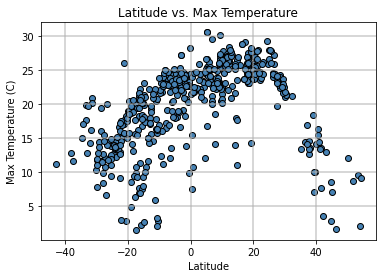

In [164]:
# Plotting the Data
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot scatter plot
plt.scatter(df["latitude"], df["temperature"], color = "steelblue", edgecolor = "black")

plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images/City Latitude vs Max Temperature.png")

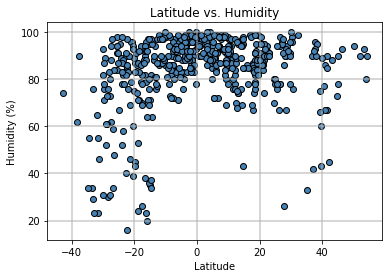

In [104]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(df["latitude"], df["humidity"], color = "steelblue", edgecolor = "black")

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images/City Latitude vs Humidity.png")

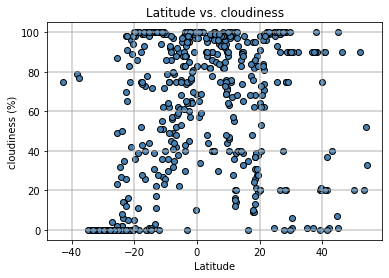

In [103]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(df["latitude"], df["cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("Latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images/City Latitude vs Humidity.png")

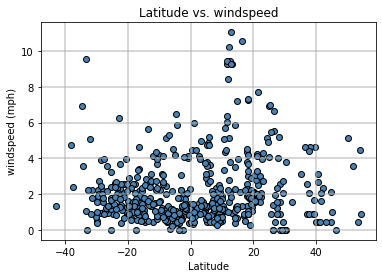

In [102]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(df["latitude"], df["windspeed"], color = "steelblue", edgecolor = "black")

plt.title("Latitude vs. windspeed")
plt.xlabel("Latitude")
plt.ylabel("windspeed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("Images/City Latitude vs Humidity.png")

In [92]:
# Linear Regression

# Subdivide data based on latitude (Northern and Southern Hemisphere) and create dataframe

north_hem_df = df.loc[df["latitude"] >= 0,:]
south_hem_df = df.loc[df["latitude"] < 0,:]

north_hem_df.head()

,city,latitude,longitude,date,temperature,humidity,cloudiness,windspeed
0,La Rioja,42.25,-2.5,None,3.6,45,1,2.35
3,Bathsheba,13.2167,-59.5167,None,27.34,74,40,9.26
4,Saint-François,46.4154,3.9054,None,1.69,93,90,0
5,Mana,5.6592,-53.7767,None,25.4,89,100,3.69
6,Savannah Bight,16.45,-85.85,None,28.89,78,35,10.54


In [93]:
south_hem_df.head()

,city,latitude,longitude,date,temperature,humidity,cloudiness,windspeed
1,Codrington,-38.2667,141.9667,None,12.9,62,79,4.73
2,Mayor Pablo Lagerenza,-19.9309,-60.7718,None,18.44,45,36,1.62
7,São Paulo de Olivença,-3.3783,-68.8725,None,24.1,94,88,0.65
9,Salta,-24.7859,-65.4117,None,12.67,67,0,0.89
10,Barranca,-10.75,-77.7667,None,15.85,87,27,3.66


In [96]:
# Linear Regression

# def plot_linear_regression(x_values, y_values, title, text_coordinates):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
#     plt.xlabel("Latitude")
#     plt.ylabel(title)
#     print(f"The r-squared is: {rvalue}")
#     plt.show()

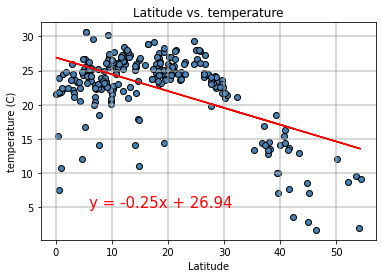

In [165]:
# Northern Hemisphere - Temperature (F) vs. Latitude

plt.scatter(north_hem_df["latitude"], north_hem_df["temperature"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. temperature")
plt.xlabel("Latitude")
plt.ylabel("temperature (C)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = north_hem_df["latitude"]
y_values = north_hem_df["temperature"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('temperature (C)')



plt.savefig('Images/northtemplat')

In [ ]:
#comments
#The plot is showing that in the northern hemisphere, towards the equator max temperatures are higher than in. 
#In particular at latitudes between 0 and 30 degrees temperatures range between 20 and 30degreesC

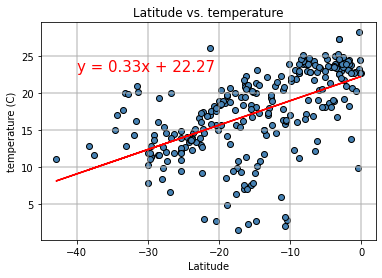

In [166]:
#Southern Hemisphere - Temperature (F) vs. Latitude

plt.scatter(south_hem_df["latitude"], south_hem_df["temperature"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. temperature")
plt.xlabel("Latitude")
plt.ylabel("temperature (C)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = south_hem_df["latitude"]
y_values = south_hem_df["temperature"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('temperature (C)')



plt.savefig('Images/southtemplat')

In [ ]:
#comments
#In the southern hemisphere temperature also increases moving towards the equator, following a linear trend.

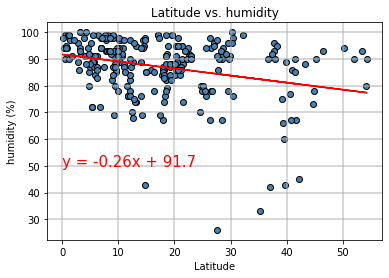

In [158]:
# Northern Hemisphere - Humidity (%) vs. Latitude

plt.scatter(north_hem_df["latitude"], north_hem_df["humidity"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. humidity")
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = north_hem_df["latitude"]
y_values = north_hem_df["humidity"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('humidity (%)')

plt.savefig('Images/northhumlat')

In [ ]:
#comments
#In the northen hemisphere cities with highest humidity, between 70% and 100% are located more towards the equator. Few cities within the dataset have low humidity, between 30% and 50%. These are located at higher latitudes, around 40deg lat.

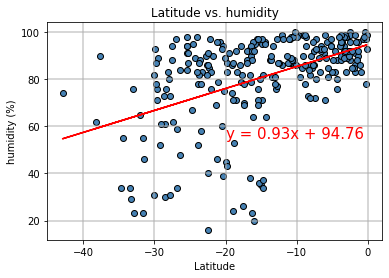

In [159]:
# Southern Hemisphere - Humidity (%) vs. Latitude

plt.scatter(south_hem_df["latitude"], south_hem_df["humidity"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. humidity")
plt.xlabel("Latitude")
plt.ylabel("humidity (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = south_hem_df["latitude"]
y_values = south_hem_df["humidity"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('humidity (%)')



plt.savefig('Images/southhumlat')

In [ ]:
#comments
# In the southern emishpere 

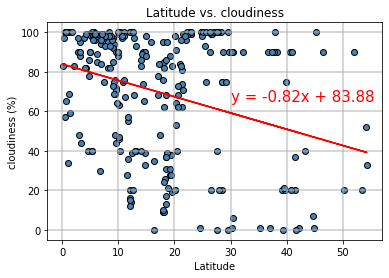

In [160]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

plt.scatter(north_hem_df["latitude"], north_hem_df["cloudiness"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. cloudiness")
plt.xlabel("Latitude")
plt.ylabel("cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = north_hem_df["latitude"]
y_values = north_hem_df["cloudiness"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,65),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')

plt.savefig('Images/northcloudlat')

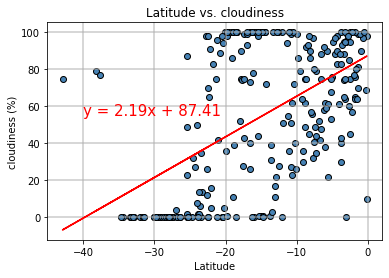

In [161]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

plt.scatter(south_hem_df["latitude"], south_hem_df["cloudiness"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. cloudiness")
plt.xlabel("latitude")
plt.ylabel("cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = south_hem_df["latitude"]
y_values = south_hem_df["cloudiness"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('cloudiness (%)')

plt.savefig('Images/southcloudlat')

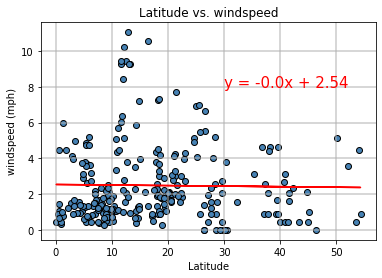

In [162]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

plt.scatter(north_hem_df["latitude"], north_hem_df["windspeed"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. windspeed")
plt.xlabel("Latitude")
plt.ylabel("windspeed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = north_hem_df["latitude"]
y_values = north_hem_df["windspeed"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('windspeed (mph)')

plt.savefig('Images/northwindlat')

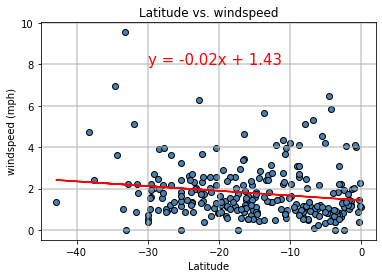

In [163]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

plt.scatter(south_hem_df["latitude"], south_hem_df["windspeed"], color = "steelblue", edgecolor = "black")
plt.title("Latitude vs. windspeed")
plt.xlabel("latitude")
plt.ylabel("windspeed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)


# Add the linear regression equation and line to plot
x_values = south_hem_df["latitude"]
y_values = south_hem_df["windspeed"]
x_values = x_values.astype(np.float64)
y_values = y_values.astype(np.float64)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('windspeed (mph)')

plt.savefig('Images/southwindlat')